detection of outliers

1-for Normal dist

    values outside of range mean-3std_dev to mean + 3 std_dev

2-for skewed data

    value outside of interquartile range


3- for other data

    value outside of 2.5 percentile to 97.5 percentile range

treatment of outliers

1-Trimming
    trim the outliers from the data

2- capping
    for values greater than or less than a fixed value we assign it new value equal to fixed value

Extras

    3- treat them as missing value
        completed before

    4- discreatization
        completed before

detection and removal of outliers

1- z score treatment

    same as above mentioned for normal dist

2- IQR based filtering

3-percentile based filtering

4- Winsorization 

    when we do capping on percentile method


# Zscore treatment

    zscore=(x(i)-u)/std
    it convert dist to a dist whose mean is 0 and std is 1
    zscore should lie between -3 to 3
    used for data distributed normally or close to normal dist
    

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("../Datasets/placement.csv")
df.sample(5)

,cgpa,placement_exam_marks,placed
797,8.14,20.0,1
721,6.98,11.0,0
265,6.94,57.0,0
374,7.34,41.0,0
964,8.09,54.0,1


C:\Users\panka\AppData\Local\Temp\ipykernel_19856\2004517978.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["cgpa"],hist=False)


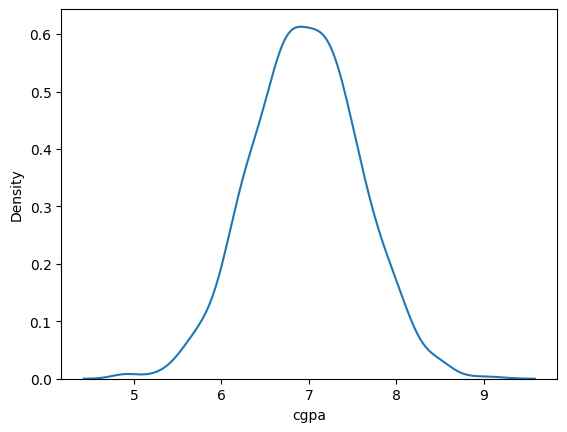

C:\Users\panka\AppData\Local\Temp\ipykernel_19856\2004517978.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["placement_exam_marks"],hist=False)


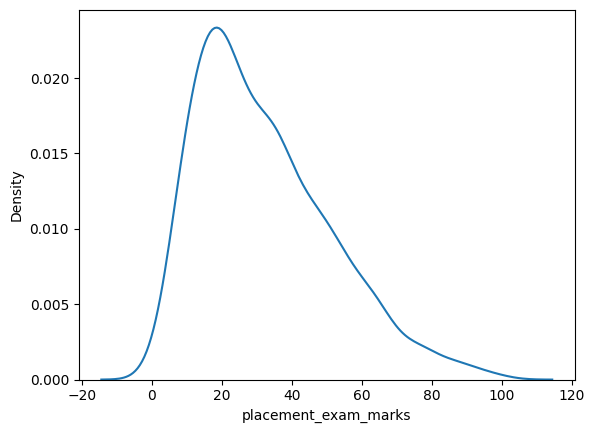

In [8]:
sns.distplot(df["cgpa"],hist=False)
plt.show()

sns.distplot(df["placement_exam_marks"],hist=False)
plt.show()

# cgpa is normally dist but placement_exam_marks is not so it is only used for cgpa

In [12]:
mean_cgpa=df["cgpa"].mean()
std_cgpa=df["cgpa"].std()

min_bound=mean_cgpa-3*std_cgpa
max_bound=mean_cgpa+3*std_cgpa

# outliers

df[(df["cgpa"]<min_bound) | (df["cgpa"]>max_bound)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [13]:
# Trimming
newdf=df
newdf=newdf[(df["cgpa"]>min_bound) & (df["cgpa"]<max_bound)]
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


C:\Users\panka\AppData\Local\Temp\ipykernel_19856\3826931474.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["cgpa"],hist=False,color="red",label="Orignal")
C:\Users\panka\AppData\Local\Temp\ipykernel_19856\3826931474.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n

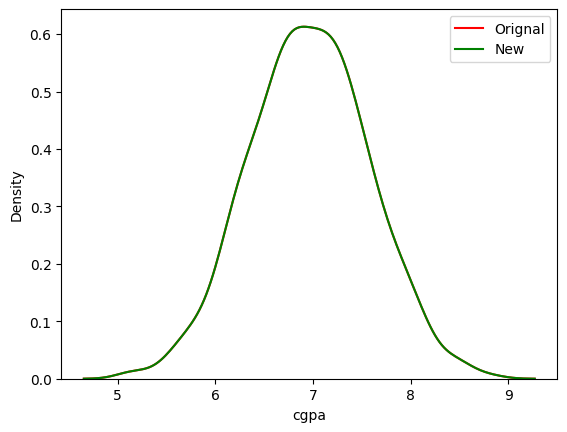

In [20]:
sns.distplot(df["cgpa"],hist=False,color="red",label="Orignal")
sns.distplot(newdf["cgpa"],hist=False,color="green",label="New")
plt.legend()
plt.show()

In [19]:
# capping
newdf=df
newdf["cgpa"]=np.where((df["cgpa"]>min_bound),df["cgpa"],min_bound)
newdf["cgpa"]=np.where((df["cgpa"]<max_bound),df["cgpa"],max_bound)
newdf

,cgpa,placement_exam_marks,placed
0,7.190000,26.0,1
1,7.460000,38.0,1
2,7.540000,40.0,1
3,6.420000,8.0,1
4,7.230000,17.0,0
...,...,...,...
995,8.808934,44.0,1
996,8.808934,65.0,1
997,5.113546,34.0,0
998,8.620000,46.0,1


C:\Users\panka\AppData\Local\Temp\ipykernel_19856\3826931474.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["cgpa"],hist=False,color="red",label="Orignal")
C:\Users\panka\AppData\Local\Temp\ipykernel_19856\3826931474.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n

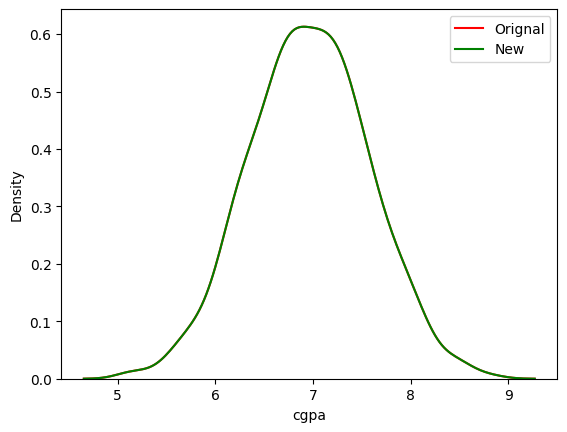

In [21]:
sns.distplot(df["cgpa"],hist=False,color="red",label="Orignal")
sns.distplot(newdf["cgpa"],hist=False,color="green",label="New")
plt.legend()
plt.show()

# IQR 
    used for skewed data

In [22]:
df=pd.read_csv("../Datasets/placement.csv")
df.sample(5)

,cgpa,placement_exam_marks,placed
148,6.86,49.0,1
830,6.46,28.0,0
72,7.90,19.0,0
423,8.27,26.0,0
607,7.76,49.0,1


In [23]:
# placement_exam_marks is skewed  so it is only used for this
df["placement_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

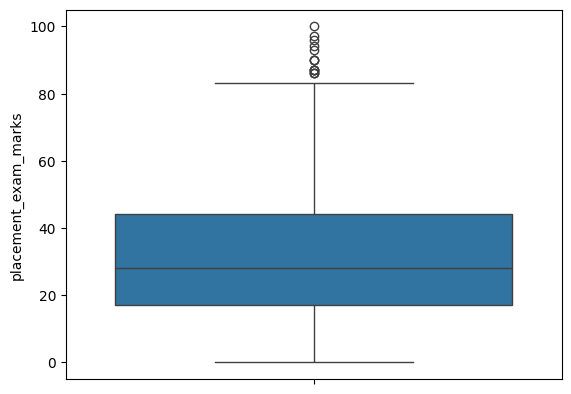

In [24]:
sns.boxplot(df["placement_exam_marks"])

In [28]:
percentile25=df["placement_exam_marks"].quantile(0.25)
percentile75=df["placement_exam_marks"].quantile(0.75)

IQR=percentile75-percentile25

min_bound=percentile25-1.5*IQR
max_bound=percentile75+1.5*IQR


In [30]:
# Trimming
newdf=df
newdf=newdf[(df["placement_exam_marks"]>min_bound) & (df["placement_exam_marks"]<max_bound)]
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\panka\AppData\Local\Temp\ipykernel_19856\418301469.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["placement_exam_marks"],hist=False,color="red",label="Orignal")
C:\Users\panka\AppData\Local\Temp\ipykernel_19856\418301469.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

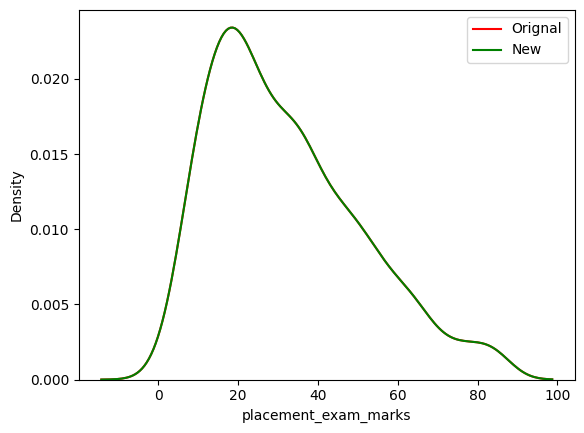

<Axes: ylabel='placement_exam_marks'>

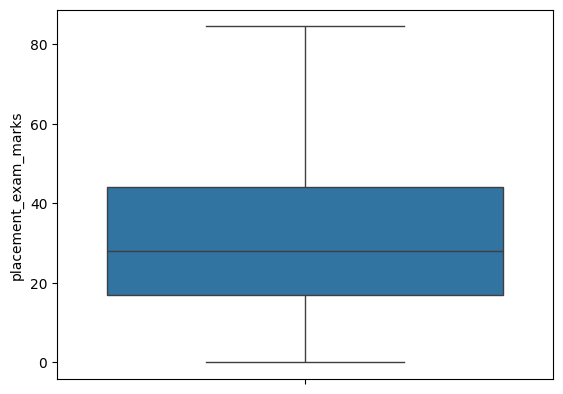

In [36]:
sns.distplot(df["placement_exam_marks"],hist=False,color="red",label="Orignal")
sns.distplot(newdf["placement_exam_marks"],hist=False,color="green",label="New")
plt.legend()
plt.show()
sns.boxplot(newdf["placement_exam_marks"])

In [34]:
# capping
newdf=df
newdf["placement_exam_marks"]=np.where((df["placement_exam_marks"]>min_bound),df["placement_exam_marks"],min_bound)
newdf["placement_exam_marks"]=np.where((df["placement_exam_marks"]<max_bound),df["placement_exam_marks"],max_bound)
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\panka\AppData\Local\Temp\ipykernel_19856\2686454231.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["placement_exam_marks"],hist=False,color="red",label="Orignal")
C:\Users\panka\AppData\Local\Temp\ipykernel_19856\2686454231.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



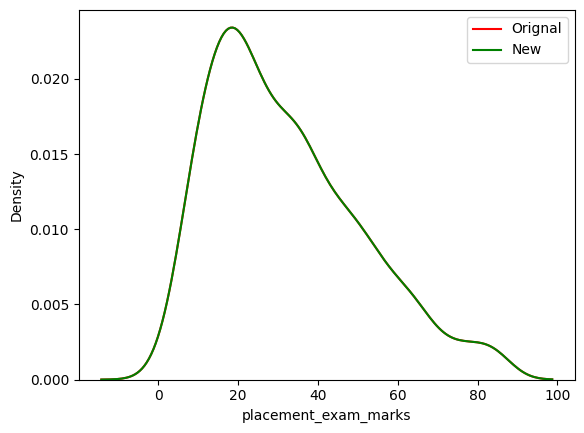

<Axes: ylabel='placement_exam_marks'>

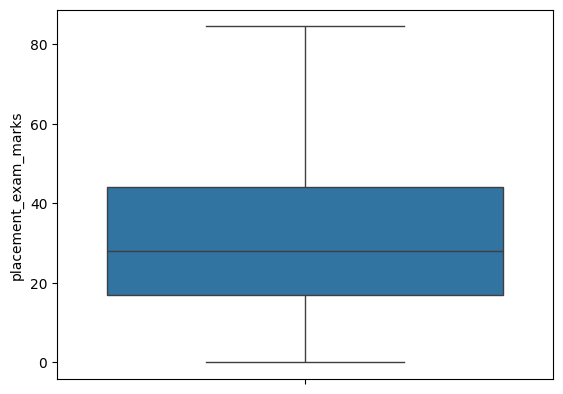

In [37]:
sns.distplot(df["placement_exam_marks"],hist=False,color="red",label="Orignal")
sns.distplot(newdf["placement_exam_marks"],hist=False,color="green",label="New")
plt.legend()
plt.show()

sns.boxplot(newdf["placement_exam_marks"])

# Percentile Method

In [38]:
df=pd.read_csv("../Datasets/weight-height.csv")
df.sample(5)

,Gender,Height,Weight
8761,Female,61.594451,117.324787
3266,Male,73.358383,212.256253
2606,Male,72.309265,203.245030
5935,Female,61.351114,121.966344
2460,Male,69.224115,167.738248


C:\Users\panka\AppData\Local\Temp\ipykernel_19856\19045970.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Height"],hist=False)


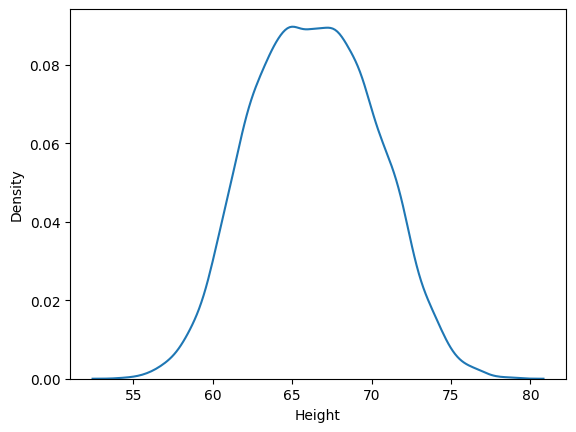

C:\Users\panka\AppData\Local\Temp\ipykernel_19856\19045970.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Weight"],hist=False)


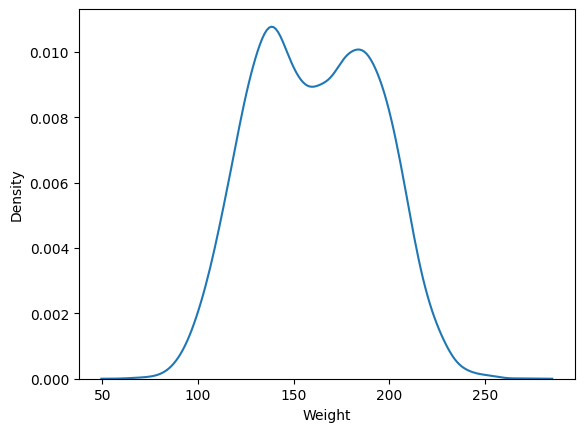

In [40]:
sns.distplot(df["Height"],hist=False)
plt.show()

sns.distplot(df["Weight"],hist=False)
plt.show()

<Axes: ylabel='Height'>

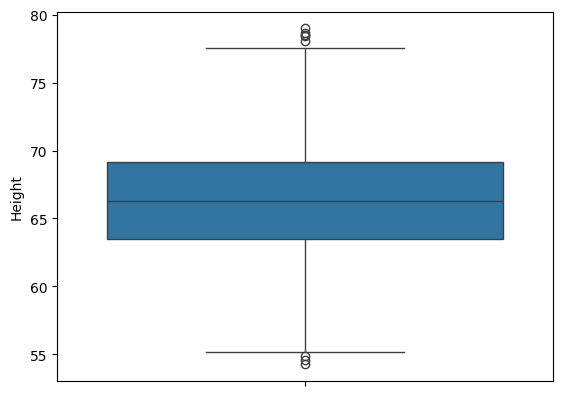

In [41]:
# i am working on height column
sns.boxplot(df["Height"])

In [53]:
# here threshold is 1
max_bound=df["Height"].quantile(0.99)
min_bound=df["Height"].quantile(0.01)


In [60]:
# Trimming
newdf=df
newdf=newdf[(df["Height"]>min_bound) & (df["Height"]<max_bound)]
newdf

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


C:\Users\panka\AppData\Local\Temp\ipykernel_19856\3286330713.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Height"],hist=False,color="red",label="Orignal")
C:\Users\panka\AppData\Local\Temp\ipykernel_19856\3286330713.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

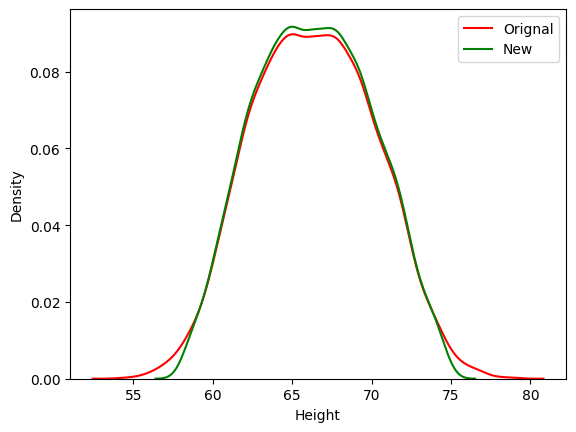

<Axes: ylabel='Height'>

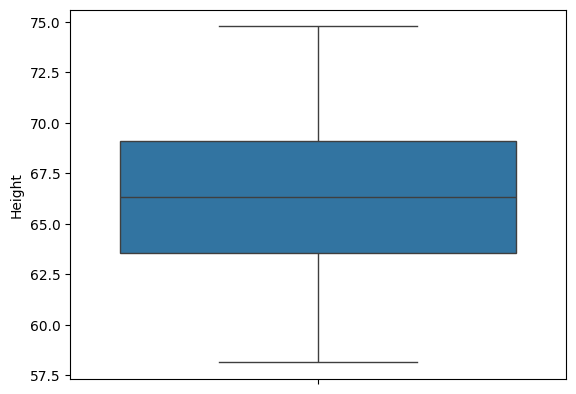

In [61]:
sns.distplot(df["Height"],hist=False,color="red",label="Orignal")
sns.distplot(newdf["Height"],hist=False,color="green",label="New")
plt.legend()
plt.show()
sns.boxplot(newdf["Height"])

In [63]:
# capping 
# here capping is known as Winsorization 
newdf=df
newdf["Height"]=np.where((df["Height"]>min_bound),df["Height"],min_bound)
newdf["Height"]=np.where((df["Height"]<max_bound),df["Height"],max_bound)
newdf

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


C:\Users\panka\AppData\Local\Temp\ipykernel_19856\3286330713.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Height"],hist=False,color="red",label="Orignal")
C:\Users\panka\AppData\Local\Temp\ipykernel_19856\3286330713.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

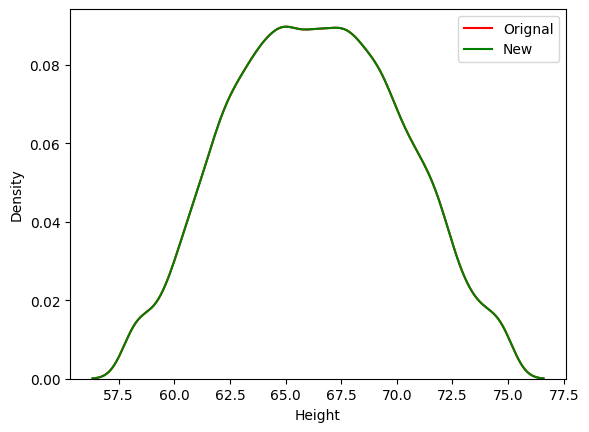

<Axes: ylabel='Height'>

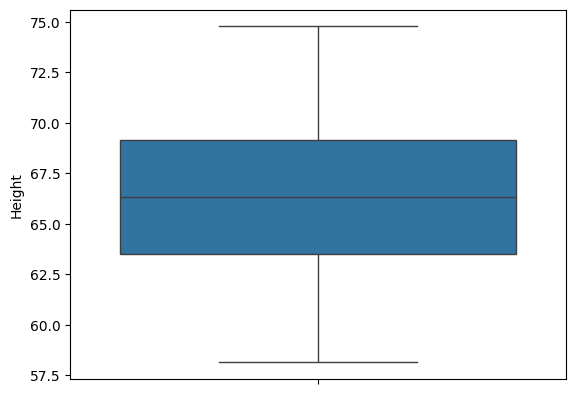

In [64]:
sns.distplot(df["Height"],hist=False,color="red",label="Orignal")
sns.distplot(newdf["Height"],hist=False,color="green",label="New")
plt.legend()
plt.show()
sns.boxplot(newdf["Height"])